In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from datetime import datetime
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

In [3]:
parent_dir = os.getcwd()
os.chdir(parent_dir)
print(os.getcwd())

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain


In [4]:
print(os.getcwd())

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain


In [5]:
list1 = ['1','2','3','4','5','6','16','none',
         1,2,3,4,5,6,16]
list2 = ["Metabolic", 'Genetic','Environmental',
         'Cellular','Organismal','Disease',
         'Disease/Metabolic','Unclassified',
         "Metabolic", 'Genetic','Environmental',
         'Cellular','Organismal','Disease',
         'Disease/Metabolic']

dictionary = dict(zip(list1, list2))
print(dictionary)
         

{'1': 'Metabolic', '2': 'Genetic', '3': 'Environmental', '4': 'Cellular', '5': 'Organismal', '6': 'Disease', '16': 'Disease/Metabolic', 'none': 'Unclassified', 1: 'Metabolic', 2: 'Genetic', 3: 'Environmental', 4: 'Cellular', 5: 'Organismal', 6: 'Disease', 16: 'Disease/Metabolic'}


In [6]:
source_dir = 'GTEX_intermediate_data'
os.chdir(source_dir)


samples = pd.read_csv('dtaa_sample_attributes.csv', index_col = 0)

os.chdir(parent_dir)
sample_tissues = samples['SMTSD'].value_counts()
#sample_tissues = sample_tissues.iloc[[
sample_tissues = sample_tissues.iloc[[0,
                                      1,
                                      2,
                                        3,
                                      4,
                                      5,6,7,8,
                                      13,
                                      15,17,
                                      19,20,
                                      23,25,
                                      27,28,
                                      30
                                     ]]


display(sample_tissues.head(50))
sample_tissues.to_csv('ordered_tissues.csv')

tissues = sample_tissues.index.to_list()
print(len(tissues))

order_des_tissue = sample_tissues.index.to_list()
print(type(order_des_tissue))
print(order_des_tissue)


Muscle - Skeletal                      234
Skin - Sun Exposed (Lower leg)         220
Whole Blood                            217
Adipose - Subcutaneous                 197
Thyroid                                196
Artery - Tibial                        188
Nerve - Tibial                         185
Skin - Not Sun Exposed (Suprapubic)    183
Lung                                   182
Adipose - Visceral (Omentum)           152
Heart - Atrial Appendage               148
Cells - Cultured fibroblasts           139
Testis                                 129
Breast - Mammary Tissue                125
Heart - Left Ventricle                 123
Esophagus - Mucosa                     116
Artery - Aorta                         106
Liver                                  106
Esophagus - Muscularis                  98
Name: SMTSD, dtype: int64

19
<class 'list'>
['Muscle - Skeletal', 'Skin - Sun Exposed (Lower leg)', 'Whole Blood', 'Adipose - Subcutaneous', 'Thyroid', 'Artery - Tibial', 'Nerve - Tibial', 'Skin - Not Sun Exposed (Suprapubic)', 'Lung', 'Adipose - Visceral (Omentum)', 'Heart - Atrial Appendage', 'Cells - Cultured fibroblasts', 'Testis', 'Breast - Mammary Tissue', 'Heart - Left Ventricle', 'Esophagus - Mucosa', 'Artery - Aorta', 'Liver', 'Esophagus - Muscularis']


staring
19
1: Muscle - Skeletal


eigen variance  size   hsac Plurality
M022        0.349182   271  empty      none
M023        0.591885    36      3         5
M009        0.596058    66      5         5
M021        0.238664  2040      6         6
M020        0.520580    95      5         6
M008        0.445261    87      4         3
M024        0.458755    58      5         5
M018        0.251195   500      2         2
M019        0.443876   177      2         2
M025        0.312857   912      2         2
M027        0.367164   334      6         2
M026        0.487393    64      2         6
M003        0.475161    89      6         6
M017        0.433058    94      4         6
M016        0.452651   108      2         2
M002        0.299908    94      5         5
M028        0.305519   745      6         2
M014        0.399515    51      6         6
M001        0.545479    36      5         5
M015        0.402685   139      2         2
M011        0.297197   666      5         5
M005        0.265445  1523      2         2
M004        0.396789   142      5         5
M010        0.246901  1347      4         6
M006        0.249370  1368      5         5
M012        0.489014    50      6         6
M013        0.346574   138      6         3
M007        0.248908  2726      1         1

eigen variance  size           hsac      Plurality
M017        0.433058    94       Cellular        Disease
M003        0.475161    89        Disease        Disease
M026        0.487393    64        Genetic        Disease
M020        0.520580    95     Organismal        Disease
M014        0.399515    51        Disease        Disease
M010        0.246901  1347       Cellular        Disease
M012        0.489014    50        Disease        Disease
M021        0.238664  2040        Disease        Disease
M008        0.445261    87       Cellular  Environmental
M013        0.346574   138        Disease  Environmental
M005        0.265445  1523        Genetic        Genetic
M018        0.251195   500        Genetic        Genetic
M028        0.305519   745        Disease        Genetic
M025        0.312857   912        Genetic        Genetic
M027        0.367164   334        Disease        Genetic
M016        0.452651   108        Genetic        Genetic
M015        0.402685   139        Genetic        Genetic
M019        0.443876   177        Genetic        Genetic
M007        0.248908  2726      Metabolic      Metabolic
M002        0.299908    94     Organismal     Organismal
M011        0.297197   666     Organismal     Organismal
M024        0.458755    58     Organismal     Organismal
M004        0.396789   142     Organismal     Organismal
M009        0.596058    66     Organismal     Organismal
M006        0.249370  1368     Organismal     Organismal
M023        0.591885    36  Environmental     Organismal
M001        0.545479    36     Organismal     Organismal
M022        0.349182   271   Unclassified   Unclassified

Muscle - Skeletal.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
2: Skin - Sun Exposed (Lower leg)


eigen variance  size   hsac Plurality
M022        0.272784   963      6         3
M036        0.426137   572      6         1
M037        0.420257   132      6      none
M023        0.427176   339      6         2
M009        0.265696  2270      6         6
M035        0.492934   255      4         2
M021        0.420803   271      6      none
M020        0.256616  1266      2         2
M008        0.389474   493      4         3
M024        0.339079   570      1         1
M018        0.362866   932      1         6
M019        0.286431  1412      3         3
M025        0.375626   374      1      none
M031        0.340186   471      2         2
M032        0.383164   163      2         2
M026        0.425439   130      2      none
M017        0.443648   241      5      none
M016        0.445964   115      6      none
M001        0.483734   255      6         5
M029        0.281169  1833  empty         2
M011        0.309250   721      5         5
M038        0.378520   498      6         6
M004        0.521683   144      5         6
M010        0.593332   107      5         5
M006        0.396060   701      5         5
M012        0.425359   114      4      none

eigen variance  size           hsac      Plurality
M038        0.378520   498        Disease        Disease
M009        0.265696  2270        Disease        Disease
M004        0.521683   144     Organismal        Disease
M018        0.362866   932      Metabolic        Disease
M022        0.272784   963        Disease  Environmental
M008        0.389474   493       Cellular  Environmental
M019        0.286431  1412  Environmental  Environmental
M032        0.383164   163        Genetic        Genetic
M023        0.427176   339        Disease        Genetic
M035        0.492934   255       Cellular        Genetic
M020        0.256616  1266        Genetic        Genetic
M029        0.281169  1833        Genetic        Genetic
M031        0.340186   471        Genetic        Genetic
M024        0.339079   570      Metabolic      Metabolic
M036        0.426137   572        Disease      Metabolic
M010        0.593332   107     Organismal     Organismal
M011        0.309250   721     Organismal     Organismal
M006        0.396060   701     Organismal     Organismal
M001        0.483734   255        Disease     Organismal
M025        0.375626   374      Metabolic   Unclassified
M017        0.443648   241     Organismal   Unclassified
M026        0.425439   130        Genetic   Unclassified
M021        0.420803   271        Disease   Unclassified
M037        0.420257   132        Disease   Unclassified
M016        0.445964   115        Disease   Unclassified
M012        0.425359   114       Cellular   Unclassified

Skin - Sun Exposed (Lower leg).pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
3: Whole Blood


eigen variance  size  hsac Plurality
M022        0.424504   333     2         2
M023        0.498487    67     5         6
M009        0.533492   146     6      none
M021        0.590540    71     6         6
M020        0.267879  2706     2      none
M008        0.399880   668     5         5
M024        0.527367    70     5         6
M018        0.507953   267     2         2
M019        0.322240  1546     5         6
M025        0.578820    83     6         6
M003        0.300823  1227     5         5
M017        0.392426  1082     6        16
M016        0.408286   605     6         6
M002        0.472305   107     3         1
M014        0.462448   134     4         4
M001        0.419854   204     3         3
M015        0.477465   437     2         6
M011        0.408436   409     5         6
M005        0.389145   362     5      none
M004        0.551391   104     1      none
M010        0.433241   442     4         2
M006        0.335048  1884     4         6
M012        0.471558   118     5         3
M013        0.393322   494     1         6
M007        0.603469   378     5         1

eigen variance  size           hsac          Plurality
M014        0.462448   134       Cellular           Cellular
M016        0.408286   605        Disease            Disease
M023        0.498487    67     Organismal            Disease
M021        0.590540    71        Disease            Disease
M006        0.335048  1884       Cellular            Disease
M024        0.527367    70     Organismal            Disease
M011        0.408436   409     Organismal            Disease
M019        0.322240  1546     Organismal            Disease
M025        0.578820    83        Disease            Disease
M015        0.477465   437        Genetic            Disease
M013        0.393322   494      Metabolic            Disease
M017        0.392426  1082        Disease  Disease/Metabolic
M012        0.471558   118     Organismal      Environmental
M001        0.419854   204  Environmental      Environmental
M010        0.433241   442       Cellular            Genetic
M022        0.424504   333        Genetic            Genetic
M018        0.507953   267        Genetic            Genetic
M002        0.472305   107  Environmental          Metabolic
M007        0.603469   378     Organismal          Metabolic
M003        0.300823  1227     Organismal         Organismal
M008        0.399880   668     Organismal         Organismal
M005        0.389145   362     Organismal       Unclassified
M004        0.551391   104      Metabolic       Unclassified
M020        0.267879  2706        Genetic       Unclassified
M009        0.533492   146        Disease       Unclassified

Whole Blood.pdf


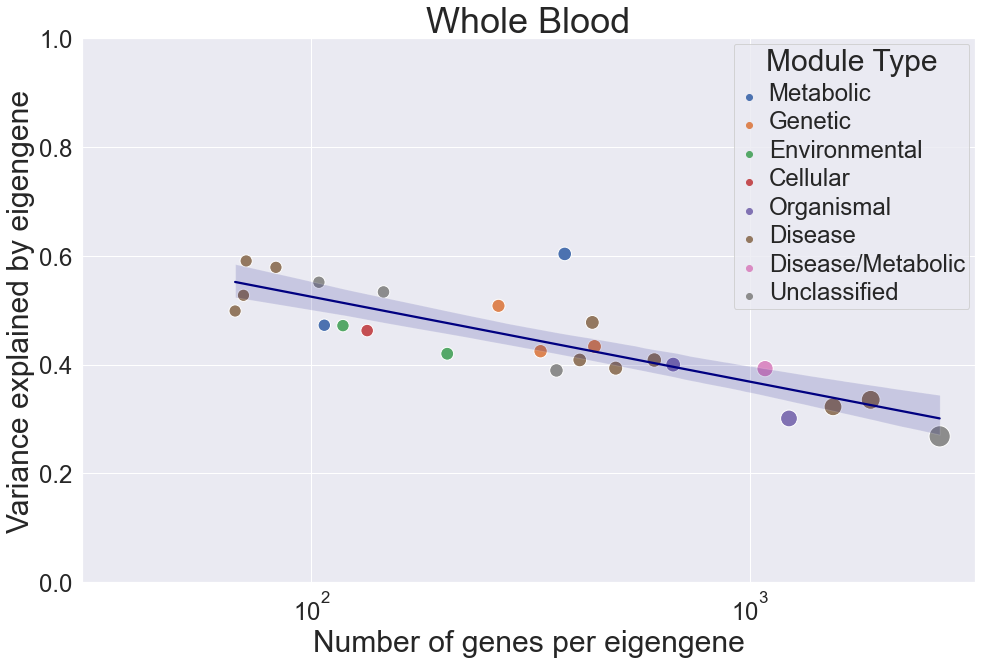

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
4: Adipose - Subcutaneous


eigen variance  size  hsac Plurality
M041        0.404993   105     3         6
M040        0.305513   764     2         2
M042        0.256498   474     5         5
M043        0.405806   250     3         6
M022        0.359906   335     6         3
M036        0.387906   184     2         2
M037        0.308456   401     6      none
M023        0.357390   139     5         6
M009        0.256448   616     6         6
M035        0.302019   385     2         2
M021        0.456140    51     5         5
M020        0.240315  1527     4         6
M034        0.332786   355     6         2
M008        0.283669   598     3         5
M030        0.308538   379     2      none
M024        0.358251   118     2         2
M018        0.476825   182     4         6
M019        0.411995   155     4         4
M025        0.361363   183     5         3
M031        0.324503   453     6         6
M027        0.659622    84     6      none
M033        0.276965   306     5         5
M032        0.334837   360     1         1
M026        0.376341   110     5         5
M003        0.291704  1472     1         1
M017        0.545418   124     5         6
M016        0.234649   744     5         3
M002        0.348656   191     6         6
M028        0.577555    82     5         5
M014        0.537227   274     3         3
M001        0.331287   448     6         6
M015        0.293272  1090     6         5
M029        0.790485    32     5         3
M011        0.346000   286     6      none
M005        0.336305   259     6         6
M039        0.341687   154     4      none
M038        0.280945   300     1         1
M004        0.337205   144     5         3
M010        0.332715   439     6         2
M006        0.360397   275     2         2
M012        0.378822   154     2      none
M013        0.294250   604     2         2
M007        0.498178   110     5         6

eigen variance  size           hsac      Plurality
M019        0.411995   155       Cellular       Cellular
M041        0.404993   105  Environmental        Disease
M005        0.336305   259        Disease        Disease
M001        0.331287   448        Disease        Disease
M002        0.348656   191        Disease        Disease
M017        0.545418   124     Organismal        Disease
M031        0.324503   453        Disease        Disease
M018        0.476825   182       Cellular        Disease
M020        0.240315  1527       Cellular        Disease
M007        0.498178   110     Organismal        Disease
M009        0.256448   616        Disease        Disease
M043        0.405806   250  Environmental        Disease
M023        0.357390   139     Organismal        Disease
M016        0.234649   744     Organismal  Environmental
M029        0.790485    32     Organismal  Environmental
M014        0.537227   274  Environmental  Environmental
M022        0.359906   335        Disease  Environmental
M025        0.361363   183     Organismal  Environmental
M004        0.337205   144     Organismal  Environmental
M024        0.358251   118        Genetic        Genetic
M036        0.387906   184        Genetic        Genetic
M010        0.332715   439        Disease        Genetic
M013        0.294250   604        Genetic        Genetic
M006        0.360397   275        Genetic        Genetic
M040        0.305513   764        Genetic        Genetic
M034        0.332786   355        Disease        Genetic
M035        0.302019   385        Genetic        Genetic
M038        0.280945   300      Metabolic      Metabolic
M032        0.334837   360      Metabolic      Metabolic
M003        0.291704  1472      Metabolic      Metabolic
M015        0.293272  1090        Disease     Organismal
M021        0.456140    51     Organismal     Organismal
M028        0.577555    82     Organismal     Organismal
M026        0.376341   110     Organismal     Organismal
M008        0.283669   598  Environmental     Organismal
M042        0.256498   474     Organismal     Organismal
M033        0.276965   306     Organismal     Organismal
M011        0.346000   286        Disease   Unclassified
M039        0.341687   154       Cellular   Unclassified
M027        0.659622    84        Disease   Unclassified
M037        0.308456   401        Disease   Unclassified
M030        0.308538   379        Genetic   Unclassified
M012        0.378822   154        Genetic   Unclassified

Adipose - Subcutaneous.pdf


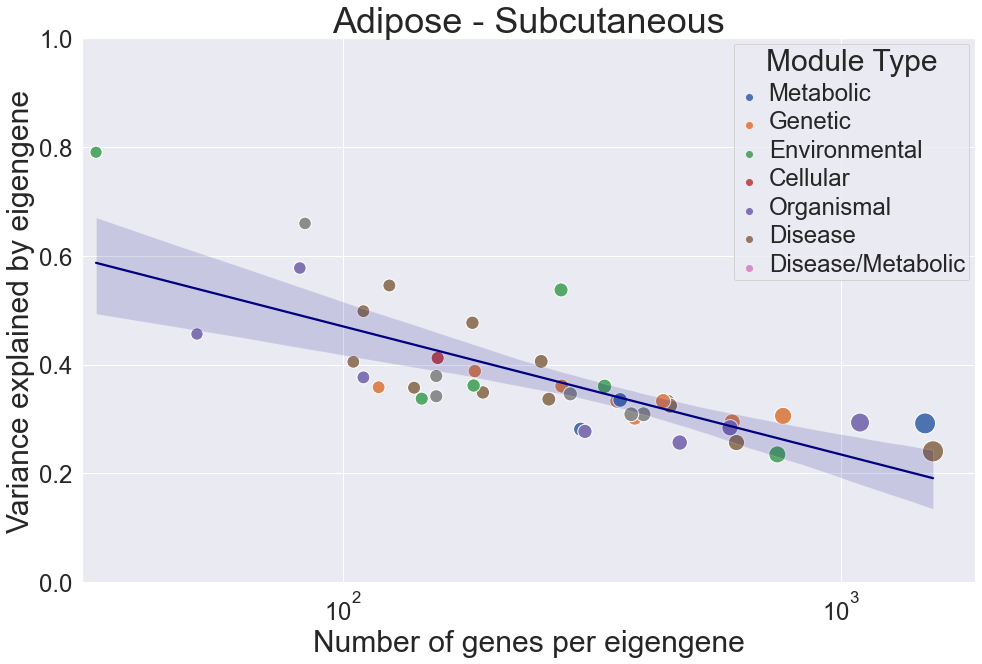

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
5: Thyroid


eigen variance  size  hsac Plurality
M041        0.349438   449     3         3
M040        0.389635   194     4      none
M042        0.449644   121     3         6
M047        0.382832   300     3         6
M046        0.332734   476     3         3
M045        0.374286    96     5         5
M022        0.332224   540     2         6
M037        0.536921   612     5         6
M023        0.557258    92     2         2
M009        0.241237  1407     6         2
M035        0.524491   118     5         5
M021        0.324980   385     6        16
M020        0.425463   319     6         6
M034        0.317465   371     3         6
M008        0.432199   124     4      none
M024        0.334038   276     2         2
M018        0.268861  1510     1         1
M019        0.324476   235     6         6
M031        0.442000   123     4         4
M027        0.428855    93     4      none
M032        0.340392   461     2         1
M026        0.407742   241     6         6
M003        0.356718   156     4         4
M017        0.344658   671     1      none
M028        0.263959  1438     1         2
M014        0.424648   141     3         3
M015        0.330740   516     3      none
M005        0.326834   151     3         6
M039        0.413766    87     5         5
M038        0.478525    84     5      none
M012        0.480242   115     5         3
M013        0.341514   773     5         5
M007        0.263158  2550     2         2

eigen variance  size           hsac          Plurality
M031        0.442000   123       Cellular           Cellular
M003        0.356718   156       Cellular           Cellular
M019        0.324476   235        Disease            Disease
M026        0.407742   241        Disease            Disease
M042        0.449644   121  Environmental            Disease
M047        0.382832   300  Environmental            Disease
M034        0.317465   371  Environmental            Disease
M005        0.326834   151  Environmental            Disease
M022        0.332224   540        Genetic            Disease
M037        0.536921   612     Organismal            Disease
M020        0.425463   319        Disease            Disease
M021        0.324980   385        Disease  Disease/Metabolic
M041        0.349438   449  Environmental      Environmental
M046        0.332734   476  Environmental      Environmental
M012        0.480242   115     Organismal      Environmental
M014        0.424648   141  Environmental      Environmental
M028        0.263959  1438      Metabolic            Genetic
M007        0.263158  2550        Genetic            Genetic
M024        0.334038   276        Genetic            Genetic
M009        0.241237  1407        Disease            Genetic
M023        0.557258    92        Genetic            Genetic
M032        0.340392   461        Genetic          Metabolic
M018        0.268861  1510      Metabolic          Metabolic
M035        0.524491   118     Organismal         Organismal
M045        0.374286    96     Organismal         Organismal
M039        0.413766    87     Organismal         Organismal
M013        0.341514   773     Organismal         Organismal
M027        0.428855    93       Cellular       Unclassified
M008        0.432199   124       Cellular       Unclassified
M017        0.344658   671      Metabolic       Unclassified
M015        0.330740   516  Environmental       Unclassified
M038        0.478525    84     Organismal       Unclassified
M040        0.389635   194       Cellular       Unclassified

Thyroid.pdf


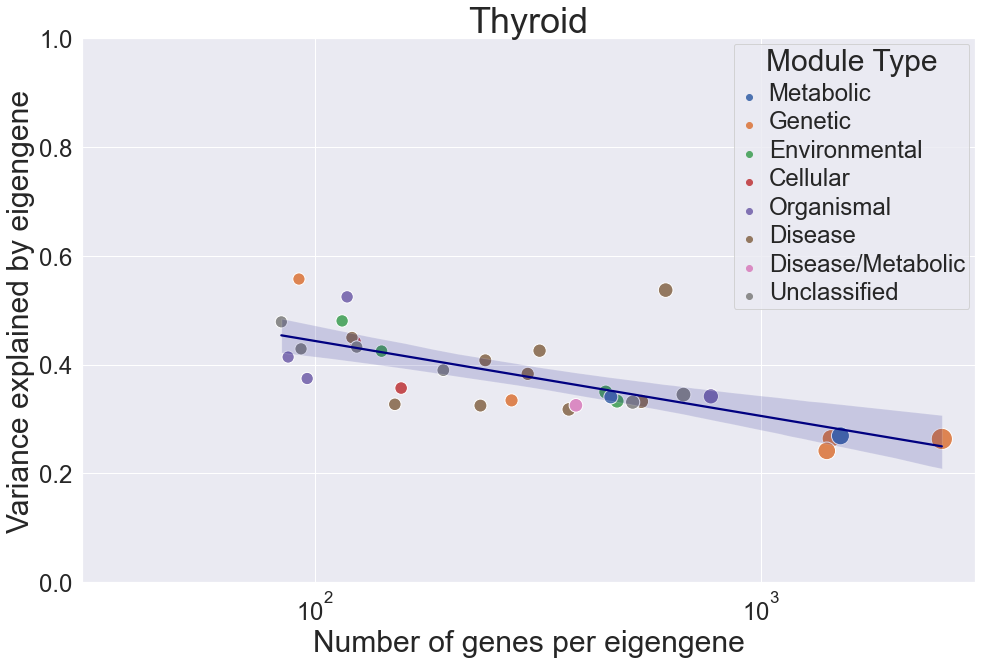

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
6: Artery - Tibial


eigen variance  size   hsac Plurality
M041        0.345160   740      4         2
M040        0.487052    93      6      none
M042        0.509502    94      6         6
M022        0.428390   232      2         2
M036        0.333056   359      2        16
M023        0.356601   253      2         2
M009        0.402501   184      3         2
M035        0.348388   408      6         1
M034        0.347736   216      4      none
M008        0.370783   615      6         6
M018        0.360639   330      5         4
M025        0.415785   413      6         2
M031        0.412127    97      1      none
M027        0.321626  1157      6         2
M033        0.425855   549      6         6
M032        0.446613   112      3         3
M026        0.478010   138      1         1
M017        0.452143   156  empty      none
M016        0.323328   873      6         6
M002        0.383230   117      3         3
M028        0.281084   821      1      none
M015        0.320998   403      2      none
M029        0.322676   522      4         1
M011        0.317901   538      5         5
M005        0.348076  1129      5         3
M039        0.287060  1999      5         5
M004        0.425577   180      3         3
M012        0.452139   100      3         3
M013        0.366463  1608      3         6

eigen variance  size           hsac          Plurality
M018        0.360639   330     Organismal           Cellular
M033        0.425855   549        Disease            Disease
M016        0.323328   873        Disease            Disease
M008        0.370783   615        Disease            Disease
M013        0.366463  1608  Environmental            Disease
M042        0.509502    94        Disease            Disease
M036        0.333056   359        Genetic  Disease/Metabolic
M004        0.425577   180  Environmental      Environmental
M005        0.348076  1129     Organismal      Environmental
M002        0.383230   117  Environmental      Environmental
M032        0.446613   112  Environmental      Environmental
M012        0.452139   100  Environmental      Environmental
M023        0.356601   253        Genetic            Genetic
M041        0.345160   740       Cellular            Genetic
M025        0.415785   413        Disease            Genetic
M022        0.428390   232        Genetic            Genetic
M009        0.402501   184  Environmental            Genetic
M027        0.321626  1157        Disease            Genetic
M029        0.322676   522       Cellular          Metabolic
M035        0.348388   408        Disease          Metabolic
M026        0.478010   138      Metabolic          Metabolic
M011        0.317901   538     Organismal         Organismal
M039        0.287060  1999     Organismal         Organismal
M031        0.412127    97      Metabolic       Unclassified
M017        0.452143   156   Unclassified       Unclassified
M040        0.487052    93        Disease       Unclassified
M034        0.347736   216       Cellular       Unclassified
M028        0.281084   821      Metabolic       Unclassified
M015        0.320998   403        Genetic       Unclassified

Artery - Tibial.pdf


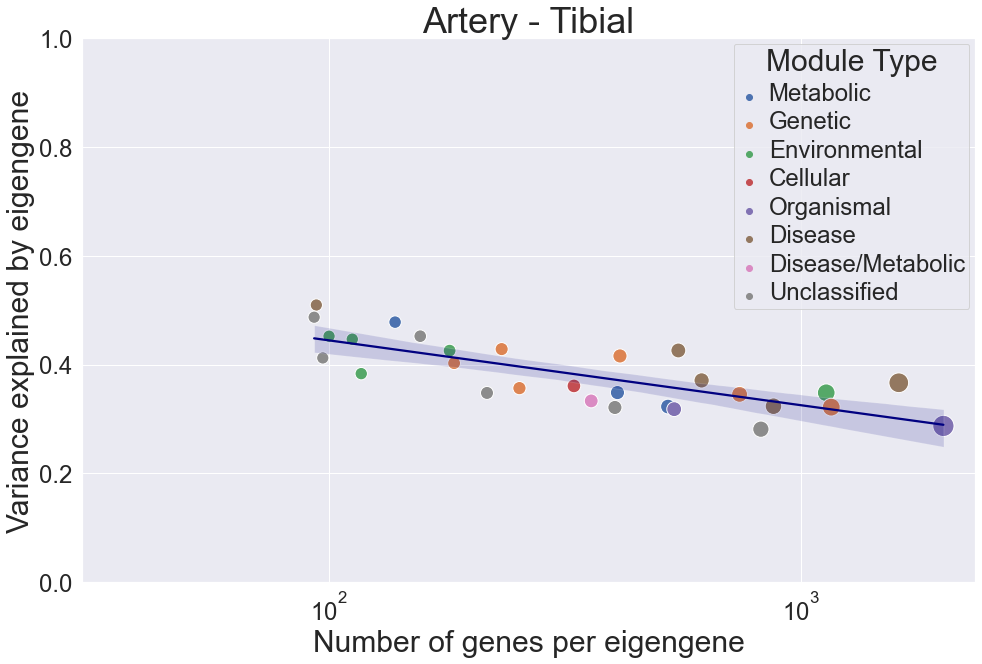

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
7: Nerve - Tibial


eigen variance  size   hsac Plurality
M043        0.282298   592      3         3
M044        0.340643   537      3         6
M045        0.346547   528      2         2
M022        0.296869   831      6         6
M036        0.285415   952      2         4
M023        0.423891   239      1      none
M021        0.283972   752  empty      none
M034        0.359288   449      2         6
M018        0.364945   392      5         3
M025        0.380821   284      4         4
M027        0.416508   192      6      none
M026        0.359797   236      4         6
M003        0.390467   189      4         4
M017        0.289857  1104      1         1
M016        0.384908   171      5         5
M002        0.405034   258      5         6
M014        0.326457   629      6         5
M015        0.342939   172      2      none
M011        0.397784   336      5         5
M005        0.355009   286      5      none
M039        0.363715   423      6         6
M038        0.312015   429      6         2
M004        0.294664   744      6         6
M006        0.270715   855      3         6
M012        0.284972   761      1         1
M013        0.339680   898      5      none
M007        0.322408   190      5         6
M048        0.312802   758      2      none

eigen variance  size           hsac      Plurality
M036        0.285415   952        Genetic       Cellular
M003        0.390467   189       Cellular       Cellular
M025        0.380821   284       Cellular       Cellular
M039        0.363715   423        Disease        Disease
M044        0.340643   537  Environmental        Disease
M007        0.322408   190     Organismal        Disease
M022        0.296869   831        Disease        Disease
M006        0.270715   855  Environmental        Disease
M034        0.359288   449        Genetic        Disease
M002        0.405034   258     Organismal        Disease
M004        0.294664   744        Disease        Disease
M026        0.359797   236       Cellular        Disease
M043        0.282298   592  Environmental  Environmental
M018        0.364945   392     Organismal  Environmental
M045        0.346547   528        Genetic        Genetic
M038        0.312015   429        Disease        Genetic
M012        0.284972   761      Metabolic      Metabolic
M017        0.289857  1104      Metabolic      Metabolic
M011        0.397784   336     Organismal     Organismal
M014        0.326457   629        Disease     Organismal
M016        0.384908   171     Organismal     Organismal
M005        0.355009   286     Organismal   Unclassified
M027        0.416508   192        Disease   Unclassified
M021        0.283972   752   Unclassified   Unclassified
M023        0.423891   239      Metabolic   Unclassified
M013        0.339680   898     Organismal   Unclassified
M015        0.342939   172        Genetic   Unclassified
M048        0.312802   758        Genetic   Unclassified

Nerve - Tibial.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
8: Skin - Not Sun Exposed (Suprapubic)


eigen variance  size   hsac Plurality
M036        0.280087  1114      2         2
M023        0.405249   562      6         6
M009        0.387789   631      6         2
M035        0.317625   833      4      none
M020        0.370891  1136  empty         2
M008        0.390973   478      6         6
M024        0.290824  1622      3        16
M025        0.375513   341      6      none
M031        0.392868   429      6      none
M033        0.314624  1118      5         5
M003        0.467653   279      4         3
M016        0.448552   251      5         6
M002        0.291364  1189      5         3
M028        0.381682   368      4         2
M001        0.461627   518      5         5
M029        0.409340   328      6         6
M011        0.322531   748      6         2
M005        0.306085   720      5         5
M004        0.306415   719      3         3
M010        0.369783   402      6         6
M006        0.423353   219      4         1
M012        0.404229   274      6      none
M013        0.429760   165      1         1
M007        0.526749   309      6         5

eigen variance  size           hsac          Plurality
M016        0.448552   251     Organismal            Disease
M023        0.405249   562        Disease            Disease
M010        0.369783   402        Disease            Disease
M008        0.390973   478        Disease            Disease
M029        0.409340   328        Disease            Disease
M024        0.290824  1622  Environmental  Disease/Metabolic
M004        0.306415   719  Environmental      Environmental
M002        0.291364  1189     Organismal      Environmental
M003        0.467653   279       Cellular      Environmental
M011        0.322531   748        Disease            Genetic
M028        0.381682   368       Cellular            Genetic
M036        0.280087  1114        Genetic            Genetic
M020        0.370891  1136        Genetic            Genetic
M009        0.387789   631        Disease            Genetic
M006        0.423353   219       Cellular          Metabolic
M013        0.429760   165      Metabolic          Metabolic
M033        0.314624  1118     Organismal         Organismal
M001        0.461627   518     Organismal         Organismal
M005        0.306085   720     Organismal         Organismal
M007        0.526749   309        Disease         Organismal
M031        0.392868   429        Disease       Unclassified
M025        0.375513   341        Disease       Unclassified
M035        0.317625   833       Cellular       Unclassified
M012        0.404229   274        Disease       Unclassified

Skin - Not Sun Exposed (Suprapubic).pdf


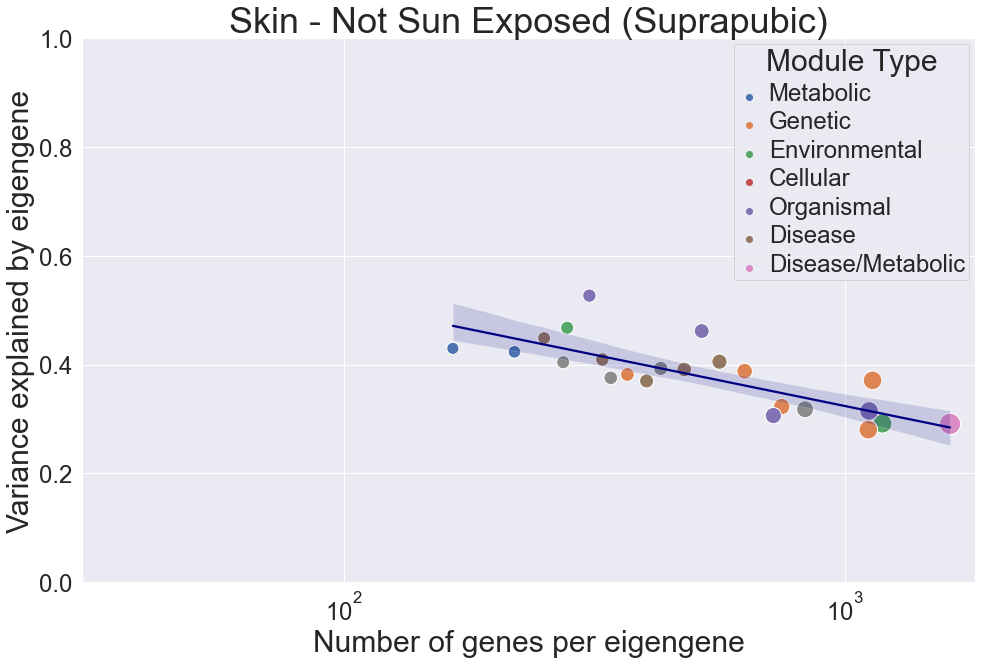

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
9: Lung


eigen variance  size   hsac Plurality
M022        0.562549   106      2         2
M023        0.443053   156  empty         2
M009        0.615492    30      6         6
M021        0.457409   131      5         5
M020        0.465568   101      5         6
M008        0.420005    57      5         5
M024        0.277985  2181      5         2
M018        0.399252   323      5         5
M019        0.281590   888      5         5
M025        0.249683  3132      4         1
M026        0.421713   454      6         6
M003        0.440187   251      4         4
M017        0.436496   124      5         6
M016        0.450363   201      5         5
M002        0.457116   147      3      none
M014        0.288582  1748      4         5
M001        0.419985  1623      1         1
M015        0.617427    34      1         1
M011        0.325977   995      2         2
M005        0.491504   203      4         4
M004        0.451223   211      1         1
M010        0.282384  1003      5         4
M006        0.415366   251      4         6
M012        0.472621   216      5         5
M013        0.278408  1270      3         6
M007        0.408597   256      6         5

eigen variance  size           hsac     Plurality
M010        0.282384  1003     Organismal      Cellular
M005        0.491504   203       Cellular      Cellular
M003        0.440187   251       Cellular      Cellular
M017        0.436496   124     Organismal       Disease
M006        0.415366   251       Cellular       Disease
M009        0.615492    30        Disease       Disease
M020        0.465568   101     Organismal       Disease
M013        0.278408  1270  Environmental       Disease
M026        0.421713   454        Disease       Disease
M011        0.325977   995        Genetic       Genetic
M022        0.562549   106        Genetic       Genetic
M024        0.277985  2181     Organismal       Genetic
M023        0.443053   156        Genetic       Genetic
M001        0.419985  1623      Metabolic     Metabolic
M015        0.617427    34      Metabolic     Metabolic
M004        0.451223   211      Metabolic     Metabolic
M025        0.249683  3132       Cellular     Metabolic
M019        0.281590   888     Organismal    Organismal
M018        0.399252   323     Organismal    Organismal
M016        0.450363   201     Organismal    Organismal
M014        0.288582  1748       Cellular    Organismal
M008        0.420005    57     Organismal    Organismal
M021        0.457409   131     Organismal    Organismal
M012        0.472621   216     Organismal    Organismal
M007        0.408597   256        Disease    Organismal
M002        0.457116   147  Environmental  Unclassified

Lung.pdf


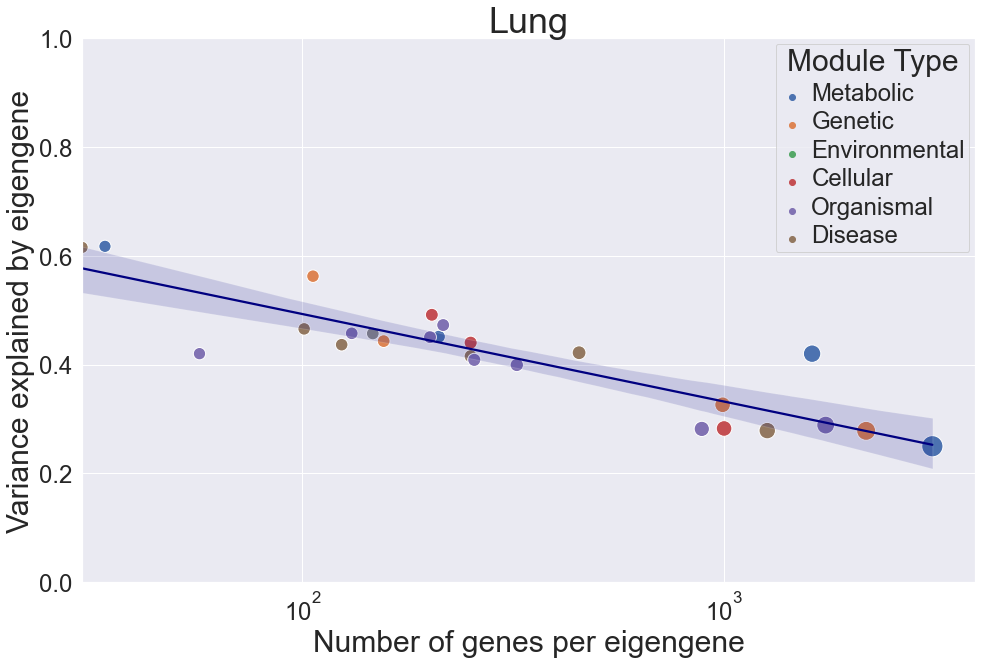

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
10: Adipose - Visceral (Omentum)


eigen variance  size  hsac Plurality
M022        0.504332    94     5         5
M023        0.694398    35     5         5
M009        0.299495  1156     6         6
M021        0.264637  2786     2         6
M020        0.418275   129     2         2
M008        0.377728   586     3         6
M024        0.727203    93     5         1
M018        0.282210   403     2         2
M019        0.273731  1300     2         6
M025        0.290843  2323     1         1
M027        0.507179    41     3         3
M026        0.320753   581     2      none
M003        0.450935   283     5         5
M017        0.339801   320     6         2
M016        0.487128    45     5      none
M002        0.568335    42     3         3
M014        0.353075   620     5         6
M001        0.400873   122     1      none
M015        0.699294    87     4         4
M011        0.513406   132     2         2
M005        0.276960   637     3         3
M004        0.455266    99     5         6
M010        0.270340  1353     6         1
M006        0.339056  1315     3         3
M012        0.488823   150     5         6
M013        0.699290    33     6         5
M007        0.290677   914     5         3

eigen variance  size           hsac      Plurality
M015        0.699294    87       Cellular       Cellular
M012        0.488823   150     Organismal        Disease
M009        0.299495  1156        Disease        Disease
M021        0.264637  2786        Genetic        Disease
M008        0.377728   586  Environmental        Disease
M004        0.455266    99     Organismal        Disease
M019        0.273731  1300        Genetic        Disease
M014        0.353075   620     Organismal        Disease
M007        0.290677   914     Organismal  Environmental
M006        0.339056  1315  Environmental  Environmental
M005        0.276960   637  Environmental  Environmental
M027        0.507179    41  Environmental  Environmental
M002        0.568335    42  Environmental  Environmental
M011        0.513406   132        Genetic        Genetic
M017        0.339801   320        Disease        Genetic
M018        0.282210   403        Genetic        Genetic
M020        0.418275   129        Genetic        Genetic
M025        0.290843  2323      Metabolic      Metabolic
M024        0.727203    93     Organismal      Metabolic
M010        0.270340  1353        Disease      Metabolic
M013        0.699290    33        Disease     Organismal
M003        0.450935   283     Organismal     Organismal
M023        0.694398    35     Organismal     Organismal
M022        0.504332    94     Organismal     Organismal
M001        0.400873   122      Metabolic   Unclassified
M026        0.320753   581        Genetic   Unclassified
M016        0.487128    45     Organismal   Unclassified

Adipose - Visceral (Omentum).pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
11: Heart - Atrial Appendage


eigen variance  size  hsac Plurality
M022        0.460704   117     5         6
M023        0.526187   166     5         5
M021        0.505952   118     3         3
M008        0.403226   396     6         2
M030        0.393969   291     4         4
M024        0.561273    97     6         5
M018        0.364252   487     5      none
M025        0.518290    88     2         1
M031        0.483489   213     2         2
M027        0.332590   693     2        16
M026        0.306899   908     3         5
M003        0.347029  1730     1         1
M017        0.469827   164     1      none
M016        0.391035   368     3         3
M028        0.377809   535     3         6
M014        0.309646  1713     3         6
M001        0.349589  1800     6        16
M015        0.418166   229     2         2
M029        0.292517   882     6         6
M011        0.532677    79     2         2
M005        0.311177   686     6         5
M004        0.476629   162     3         5
M010        0.315760  1139     6         2
M006        0.293862  1272     3         3
M013        0.376952   137     5         3
M007        0.369494   159     3         3

eigen variance  size           hsac          Plurality
M030        0.393969   291       Cellular           Cellular
M022        0.460704   117     Organismal            Disease
M029        0.292517   882        Disease            Disease
M014        0.309646  1713  Environmental            Disease
M028        0.377809   535  Environmental            Disease
M001        0.349589  1800        Disease  Disease/Metabolic
M027        0.332590   693        Genetic  Disease/Metabolic
M006        0.293862  1272  Environmental      Environmental
M016        0.391035   368  Environmental      Environmental
M013        0.376952   137     Organismal      Environmental
M007        0.369494   159  Environmental      Environmental
M021        0.505952   118  Environmental      Environmental
M031        0.483489   213        Genetic            Genetic
M008        0.403226   396        Disease            Genetic
M015        0.418166   229        Genetic            Genetic
M011        0.532677    79        Genetic            Genetic
M010        0.315760  1139        Disease            Genetic
M003        0.347029  1730      Metabolic          Metabolic
M025        0.518290    88        Genetic          Metabolic
M024        0.561273    97        Disease         Organismal
M005        0.311177   686        Disease         Organismal
M004        0.476629   162  Environmental         Organismal
M023        0.526187   166     Organismal         Organismal
M026        0.306899   908  Environmental         Organismal
M018        0.364252   487     Organismal       Unclassified
M017        0.469827   164      Metabolic       Unclassified

Heart - Atrial Appendage.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
12: Cells - Cultured fibroblasts


eigen variance  size  hsac  Plurality
M003        0.389668  2116     6          6
M002        0.372466  1634     2          1
M001        0.311016  4279     4          5
M005        0.407824  2385     4         16
M004        0.616041    69     5          5
M006        0.334687  3593     2          2

eigen variance  size        hsac          Plurality
M003        0.389668  2116     Disease            Disease
M005        0.407824  2385    Cellular  Disease/Metabolic
M006        0.334687  3593     Genetic            Genetic
M002        0.372466  1634     Genetic          Metabolic
M001        0.311016  4279    Cellular         Organismal
M004        0.616041    69  Organismal         Organismal

Cells - Cultured fibroblasts.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
13: Testis


eigen variance  size   hsac Plurality
M008        0.495413   264      2         2
M003        0.437519  5783  empty         6
M002        0.400197  2411      1         1
M001        0.438598  1150      3         2
M005        0.431525   757      2      none
M004        0.432013  6311      3      none
M006        0.506656   255      2      none
M007        0.645528   281      4         2

eigen variance  size           hsac     Plurality
M003        0.437519  5783        Disease       Disease
M008        0.495413   264        Genetic       Genetic
M001        0.438598  1150  Environmental       Genetic
M007        0.645528   281       Cellular       Genetic
M002        0.400197  2411      Metabolic     Metabolic
M005        0.431525   757        Genetic  Unclassified
M004        0.432013  6311  Environmental  Unclassified
M006        0.506656   255        Genetic  Unclassified

Testis.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
14: Breast - Mammary Tissue


eigen variance  size  hsac Plurality
M009        0.472394   579     5         6
M021        0.728446    79     4         6
M020        0.665826   454     5         5
M008        0.348145   781     2         2
M018        0.413442   334     2         2
M019        0.371466   607     6         6
M003        0.418316   857     1         6
M017        0.476815   145     1         1
M016        0.414943   963     1         1
M002        0.323219  4796     6         6
M014        0.302073   672     5         5
M001        0.390591   566     2         2
M015        0.350391   263     5      none
M011        0.337675   963     3         6
M005        0.536119   119     6         6
M004        0.332232   439     2         2
M010        0.285204  2844     6         6
M006        0.627482    74     3         3
M012        0.561662    49     6         6
M013        0.323961   649     3         5
M007        0.517905   151     4         4

eigen variance  size           hsac      Plurality
M007        0.517905   151       Cellular       Cellular
M012        0.561662    49        Disease        Disease
M010        0.285204  2844        Disease        Disease
M005        0.536119   119        Disease        Disease
M011        0.337675   963  Environmental        Disease
M002        0.323219  4796        Disease        Disease
M009        0.472394   579     Organismal        Disease
M019        0.371466   607        Disease        Disease
M021        0.728446    79       Cellular        Disease
M003        0.418316   857      Metabolic        Disease
M006        0.627482    74  Environmental  Environmental
M001        0.390591   566        Genetic        Genetic
M018        0.413442   334        Genetic        Genetic
M008        0.348145   781        Genetic        Genetic
M004        0.332232   439        Genetic        Genetic
M017        0.476815   145      Metabolic      Metabolic
M016        0.414943   963      Metabolic      Metabolic
M013        0.323961   649  Environmental     Organismal
M020        0.665826   454     Organismal     Organismal
M014        0.302073   672     Organismal     Organismal
M015        0.350391   263     Organismal   Unclassified

Breast - Mammary Tissue.pdf


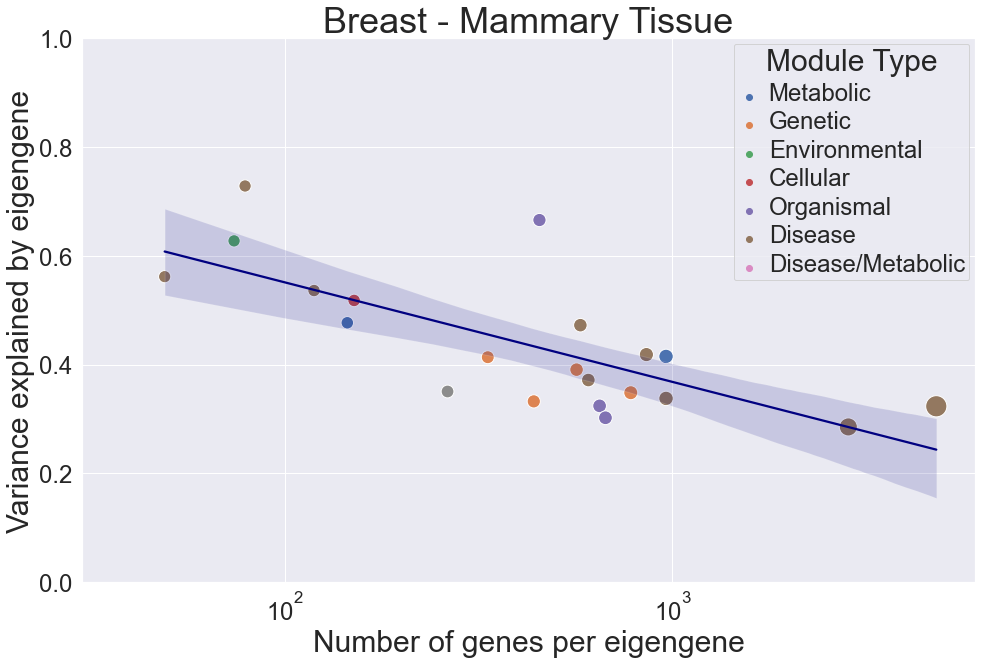

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
15: Heart - Left Ventricle


eigen variance  size  hsac Plurality
M009        0.467698   271     6         6
M008        0.499646    50     5         5
M018        0.336013  1585     6         6
M019        0.406115   272     6      none
M003        0.428388  2752     6         1
M017        0.338197  1566     2         6
M016        0.748930    43     6         6
M002        0.309534  2246     2         2
M014        0.824938    54     4         4
M001        0.318312  1472     2         2
M015        0.644950    50     2         2
M011        0.458972   290     2         2
M005        0.537709    73     5         6
M004        0.347301  1243     5         6
M010        0.485604   296     3         3
M006        0.658646   114     5         6
M012        0.349206  1654     3         3
M013        0.476378   249     5      none
M007        0.622806    65     5         6

eigen variance  size           hsac      Plurality
M014        0.824938    54       Cellular       Cellular
M009        0.467698   271        Disease        Disease
M006        0.658646   114     Organismal        Disease
M004        0.347301  1243     Organismal        Disease
M005        0.537709    73     Organismal        Disease
M016        0.748930    43        Disease        Disease
M007        0.622806    65     Organismal        Disease
M018        0.336013  1585        Disease        Disease
M017        0.338197  1566        Genetic        Disease
M010        0.485604   296  Environmental  Environmental
M012        0.349206  1654  Environmental  Environmental
M002        0.309534  2246        Genetic        Genetic
M015        0.644950    50        Genetic        Genetic
M011        0.458972   290        Genetic        Genetic
M001        0.318312  1472        Genetic        Genetic
M003        0.428388  2752        Disease      Metabolic
M008        0.499646    50     Organismal     Organismal
M013        0.476378   249     Organismal   Unclassified
M019        0.406115   272        Disease   Unclassified

Heart - Left Ventricle.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
16: Esophagus - Mucosa


eigen variance  size  hsac Plurality
M022        0.507159   120     3         1
M009        0.267782  1520     2         2
M021        0.454379   263     4         6
M020        0.313202   955     4         4
M008        0.312545  2267     2         2
M018        0.568204   152     5         5
M019        0.592245    45     5         5
M003        0.336244  1063     6         6
M017        0.436896   145     4      none
M016        0.346587   797     4         6
M002        0.363733   755     4         3
M014        0.531078    39     6         6
M001        0.381151  1741     5         5
M015        0.338679  3118     3         5
M011        0.508895    61     6         6
M005        0.462653   192     2         2
M004        0.387061   461     2        16
M010        0.436615   248     2         2
M006        0.417804   441     2         2
M012        0.470821   353     5         6
M013        0.636541    37     5         5
M007        0.381382   668     1      none

eigen variance  size           hsac          Plurality
M020        0.313202   955       Cellular           Cellular
M021        0.454379   263       Cellular            Disease
M012        0.470821   353     Organismal            Disease
M003        0.336244  1063        Disease            Disease
M016        0.346587   797       Cellular            Disease
M014        0.531078    39        Disease            Disease
M011        0.508895    61        Disease            Disease
M004        0.387061   461        Genetic  Disease/Metabolic
M002        0.363733   755       Cellular      Environmental
M009        0.267782  1520        Genetic            Genetic
M008        0.312545  2267        Genetic            Genetic
M006        0.417804   441        Genetic            Genetic
M010        0.436615   248        Genetic            Genetic
M005        0.462653   192        Genetic            Genetic
M022        0.507159   120  Environmental          Metabolic
M001        0.381151  1741     Organismal         Organismal
M013        0.636541    37     Organismal         Organismal
M019        0.592245    45     Organismal         Organismal
M018        0.568204   152     Organismal         Organismal
M015        0.338679  3118  Environmental         Organismal
M017        0.436896   145       Cellular       Unclassified
M007        0.381382   668      Metabolic       Unclassified

Esophagus - Mucosa.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
17: Artery - Aorta


eigen variance  size   hsac Plurality
M054        0.287605   238      2      none
M042        0.401829   303      1         6
M046        0.273946  1186      2         6
M052        0.402629   130  empty      none
M050        0.380740   125      6         6
M051        0.326989   134      2         2
M045        0.358111   479      6         2
M022        0.282937   685      1      none
M037        0.335706   472      3         5
M023        0.255563   135      5         6
M009        0.305265   410      2      none
M021        0.278135  1096      5         5
M020        0.393121   179      1         1
M034        0.328308  1472      3         6
M008        0.366658   123      2      none
M030        0.294146   380      6      none
M024        0.291870   657      2      none
M018        0.319866   342      5      none
M019        0.303871   610      4         5
M025        0.277721  1505      6         2
M031        0.399359   134      4         1
M032        0.300659   177  empty         4
M026        0.376594   190      1      none
M014        0.338301   336      6         6
M001        0.504650   139      2         2
M015        0.428793   176      6         4
M029        0.307658   130      3         1
M038        0.354941   415  empty         5
M010        0.309117   450      5         5
M006        0.347954   314      2         6
M012        0.423819   111      6      none
M007        0.287920   214      4         4
M048        0.338763   499      4         6

eigen variance  size           hsac     Plurality
M032        0.300659   177       Cellular      Cellular
M015        0.428793   176        Disease      Cellular
M007        0.287920   214       Cellular      Cellular
M048        0.338763   499       Cellular       Disease
M034        0.328308  1472  Environmental       Disease
M023        0.255563   135     Organismal       Disease
M006        0.347954   314        Genetic       Disease
M014        0.338301   336        Disease       Disease
M050        0.380740   125        Disease       Disease
M046        0.273946  1186        Genetic       Disease
M042        0.401829   303      Metabolic       Disease
M051        0.326989   134        Genetic       Genetic
M001        0.504650   139        Genetic       Genetic
M025        0.277721  1505        Disease       Genetic
M045        0.358111   479        Disease       Genetic
M020        0.393121   179      Metabolic     Metabolic
M029        0.307658   130  Environmental     Metabolic
M031        0.399359   134       Cellular     Metabolic
M037        0.335706   472  Environmental    Organismal
M010        0.309117   450     Organismal    Organismal
M038        0.354941   415     Organismal    Organismal
M019        0.303871   610       Cellular    Organismal
M021        0.278135  1096     Organismal    Organismal
M012        0.423819   111        Disease  Unclassified
M054        0.287605   238        Genetic  Unclassified
M018        0.319866   342     Organismal  Unclassified
M030        0.294146   380        Disease  Unclassified
M008        0.366658   123        Genetic  Unclassified
M009        0.305265   410        Genetic  Unclassified
M022        0.282937   685      Metabolic  Unclassified
M052        0.402629   130   Unclassified  Unclassified
M026        0.376594   190      Metabolic  Unclassified
M024        0.291870   657        Genetic  Unclassified

Artery - Aorta.pdf


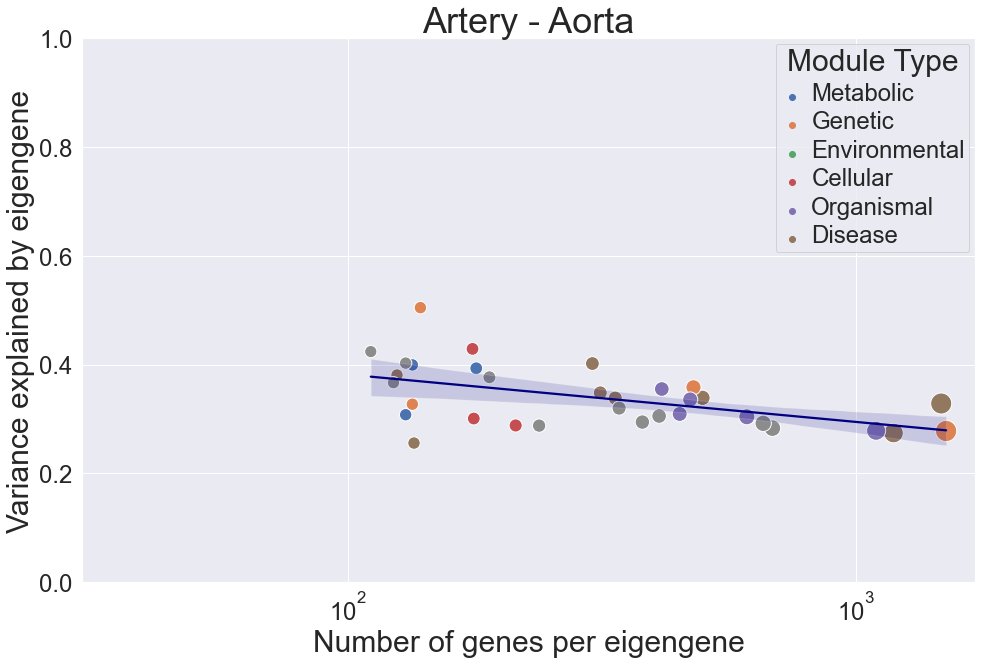

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
18: Liver


eigen variance  size  hsac Plurality
M036        0.447590   112     1         1
M037        0.273204  2185     6         6
M035        0.410151   605     5         5
M034        0.351906   128     1      none
M008        0.394341   282     5         6
M030        0.291776   796     6         6
M024        0.395644   312     2         2
M018        0.362749   460     4         6
M019        0.356406   501     3         5
M025        0.381859   307     6         6
M027        0.370724   191     1      none
M033        0.370445   217     6         6
M026        0.481303   132     2         2
M003        0.406367   252     1      none
M017        0.472525   273     3         3
M016        0.440953   160     3         3
M002        0.263727   325     6         6
M028        0.378524   471     3         5
M001        0.445497   339     5         5
M029        0.364228    86     5         5
M011        0.463016    89     5         5
M005        0.374500   559     3         6
M038        0.298869  1233     1         1
M004        0.351587   308     2      none
M010        0.391308   505     1         1
M006        0.307701  2150     2         6
M012        0.337102   680     2         6
M007        0.399243   173     6         6

eigen variance  size           hsac      Plurality
M007        0.399243   173        Disease        Disease
M012        0.337102   680        Genetic        Disease
M033        0.370445   217        Disease        Disease
M005        0.374500   559  Environmental        Disease
M025        0.381859   307        Disease        Disease
M018        0.362749   460       Cellular        Disease
M002        0.263727   325        Disease        Disease
M030        0.291776   796        Disease        Disease
M008        0.394341   282     Organismal        Disease
M006        0.307701  2150        Genetic        Disease
M037        0.273204  2185        Disease        Disease
M016        0.440953   160  Environmental  Environmental
M017        0.472525   273  Environmental  Environmental
M026        0.481303   132        Genetic        Genetic
M024        0.395644   312        Genetic        Genetic
M010        0.391308   505      Metabolic      Metabolic
M038        0.298869  1233      Metabolic      Metabolic
M036        0.447590   112      Metabolic      Metabolic
M001        0.445497   339     Organismal     Organismal
M029        0.364228    86     Organismal     Organismal
M011        0.463016    89     Organismal     Organismal
M019        0.356406   501  Environmental     Organismal
M035        0.410151   605     Organismal     Organismal
M028        0.378524   471  Environmental     Organismal
M027        0.370724   191      Metabolic   Unclassified
M004        0.351587   308        Genetic   Unclassified
M034        0.351906   128      Metabolic   Unclassified
M003        0.406367   252      Metabolic   Unclassified

Liver.pdf


/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain
19: Esophagus - Muscularis


eigen variance  size   hsac Plurality
M040        0.422214   182      1      none
M042        0.348109   319      6         4
M044        0.381525   431      6         2
M022        0.403359   351      1         6
M036        0.395641   305      6      none
M009        0.291329  1837      5      none
M035        0.504633   259      5         1
M021        0.323786  1002      6         5
M020        0.366518   277      5         5
M008        0.339875   404      2         2
M024        0.428820   237      6         6
M019        0.346821   576      6         1
M025        0.430966   175      2         2
M031        0.326236  1236      3         6
M027        0.781674   460      5         5
M033        0.455480   308      2         2
M032        0.297327  1291      2         2
M003        0.285112  1331      3         3
M017        0.408317   173      1      none
M016        0.396511   221      6         6
M002        0.503002   174      5         5
M001        0.470444   154      4         5
M029        0.305615  1170  empty         2
M011        0.496204   215      3         3
M039        0.329775   211      2      none
M004        0.361165   755  empty         6
M010        0.347517   437      3         5

eigen variance  size           hsac      Plurality
M042        0.348109   319        Disease       Cellular
M031        0.326236  1236  Environmental        Disease
M016        0.396511   221        Disease        Disease
M022        0.403359   351      Metabolic        Disease
M004        0.361165   755        Disease        Disease
M024        0.428820   237        Disease        Disease
M003        0.285112  1331  Environmental  Environmental
M011        0.496204   215  Environmental  Environmental
M032        0.297327  1291        Genetic        Genetic
M008        0.339875   404        Genetic        Genetic
M029        0.305615  1170        Genetic        Genetic
M025        0.430966   175        Genetic        Genetic
M044        0.381525   431        Disease        Genetic
M033        0.455480   308        Genetic        Genetic
M019        0.346821   576        Disease      Metabolic
M035        0.504633   259     Organismal      Metabolic
M001        0.470444   154       Cellular     Organismal
M002        0.503002   174     Organismal     Organismal
M010        0.347517   437  Environmental     Organismal
M027        0.781674   460     Organismal     Organismal
M020        0.366518   277     Organismal     Organismal
M021        0.323786  1002        Disease     Organismal
M009        0.291329  1837     Organismal   Unclassified
M036        0.395641   305        Disease   Unclassified
M039        0.329775   211        Genetic   Unclassified
M017        0.408317   173      Metabolic   Unclassified
M040        0.422214   182      Metabolic   Unclassified

Esophagus - Muscularis.pdf


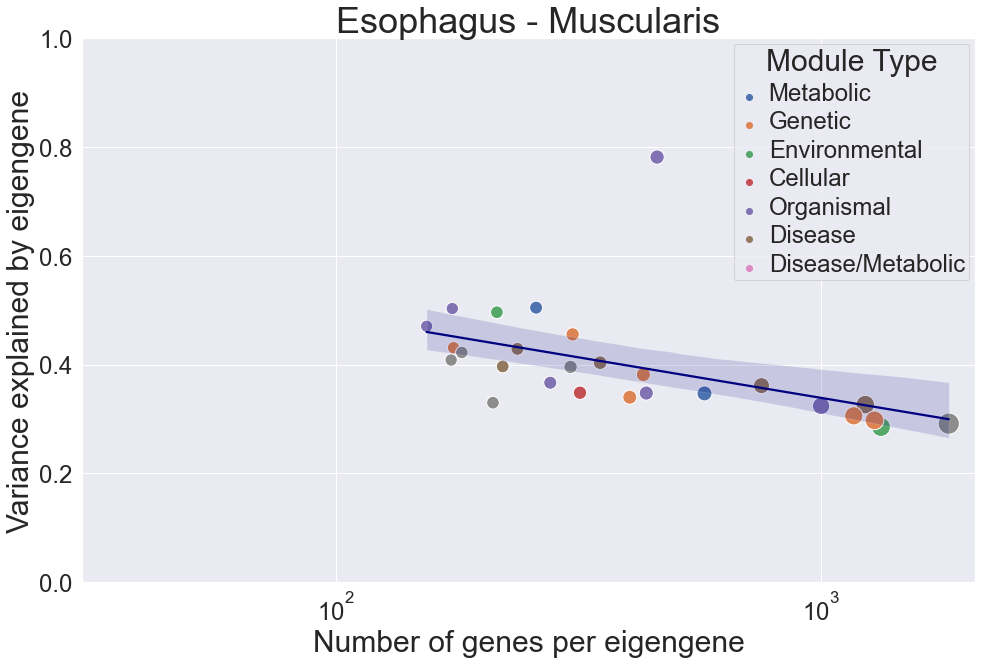

/Users/sussman/Documents2/2023AResearch/data/Dynamic19AllSeed1001NoBrain


In [7]:
b = len(tissues)
print('staring')
print(b)



for i in range(b):
    
    os.chdir(parent_dir)
    j = i+1
    print(str(j)+': '+tissues[i])
    os.chdir('Tissues')
    os.chdir(tissues[i])
    
    
    custom_palette = sns.color_palette(['red', 'darkcyan', 'deepskyblue','blue','lime','darkgreen','black'])
    
    os.chdir('RProcessedNumber2')
    circles_df = pd.read_csv('circle_data.csv',index_col=0)
    display(circles_df.head(50))
    for ii in range(circles_df.shape[0]):
        if circles_df.iloc[ii,2] == 'empty':
            circles_df.iloc[ii,2] = circles_df.iloc[ii,3]
    for ii in range(circles_df.shape[0]):
        circles_df.iloc[ii,3] = dictionary[circles_df.iloc[ii,3]]
        circles_df.iloc[ii,2] = dictionary[circles_df.iloc[ii,2]]
        
    
    
    circles_df.sort_values(by=['Plurality'],inplace=True)
    display(circles_df.head(50))
    
    circles_df.to_csv('circle_data2.csv')
    plt.figure(figsize=(16, 10))
    ax = sns.scatterplot(data=circles_df, x='size', y='eigen variance', hue='Plurality', 
                         hue_order = ["Metabolic", 'Genetic','Environmental','Cellular','Organismal','Disease','Disease/Metabolic','Unclassified'], size="size",sizes=(150,450))
    sns.regplot(data=circles_df, x='size', y='eigen variance', scatter=False, fit_reg=True, logx=True, color='navy')

    # Set the x-axis to logarithmic scale
    plt.xscale('log')
    plt.ylim(0,1)
    plt.xlim(30,None)
    #plt.xticks(ticks=[0, 250, 500, 750, 1000,3000])
    plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.00],fontsize='24')
    plt.xticks(fontsize='24')

    #plt.setp(ax.get_legend().get_texts(), fontsize='26') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

    # Customize the plot appearance
    plt.title(tissues[i],fontsize='36')
    plt.xlabel('Number of genes per eigengene',fontsize='30')
    plt.ylabel('Variance explained by eigengene',fontsize='30')
    
    handles, labels = ax.get_legend_handles_labels()
    legend_entries = len( circles_df['Plurality'].unique()) + 1
    legend = plt.legend(handles=handles[1:legend_entries], labels=labels[1:legend_entries], title='Module Type', loc='upper right',title_fontsize='30')
    nameOfImage = tissues[i]+'.pdf'
    print(nameOfImage)
    


    # Adjust the legend title font size
    #legend.set_title("Module Type")
    '''
    plt.setp(legend.get_title(), fontsize=15)
'''
    # Adjust legend font size
    for text in legend.texts:
        text.set_fontsize(24)
    plt.savefig(nameOfImage, format='pdf', dpi=350, bbox_inches='tight')


    

    plt.show()
    
                       
    
    
    
    
    os.chdir(parent_dir)
    print(os.getcwd())
    
    
      

In [8]:
print('done')

done
